# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

In [ ]:
!pip3 uninstall networkx

Found existing installation: networkx 2.6.3
Uninstalling networkx-2.6.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/networkx-2.6.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.6.3/LICENSE.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.6.3/examples/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/plot_beam_search.py
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/plot_betweenness_centrality.py
    /usr/local/share/doc/networkx-2.6.3/ex

<br>

In [ ]:

!pip install networkx==2.3


     |████████████████████████████████| 1.7 MB 43.1 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=5f01299bca202216f2ca832a3d750ef5c777f60caf86f7e2d4ab4ed2c57d34d2
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip3 install stellargraph

     |████████████████████████████████| 435 kB 22.5 MB/s 


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [1]:
import gdown
!gdown --id 1VrUz_89sqaFIP926iAnpO8mxHR1y6D_2

Downloading...
From: https://drive.google.com/uc?id=1VrUz_89sqaFIP926iAnpO8mxHR1y6D_2
To: /content/movie_actor_network.csv
100% 114k/114k [00:00<00:00, 52.3MB/s]


In [3]:
import pandas as pd
data=pd.read_csv('/content/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
#len(data['actor'].unique()), len(data['movie'].unique())

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')



A = list(nx.connected_component_subgraphs(B))[0]

In [ ]:
#A = list(B.subgraph(c) for c in nx.connected_components(B))[0]

In [ ]:
type(A)

networkx.classes.graph.Graph

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


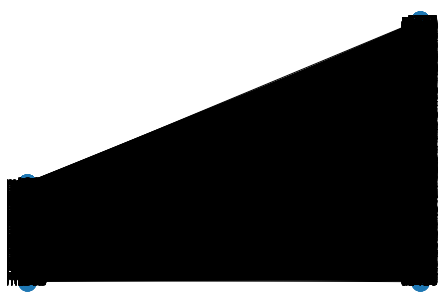

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:
#this cell's purpose is in line with genearation of w2v vectors
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

#print(walks)

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


NameError: ignored

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

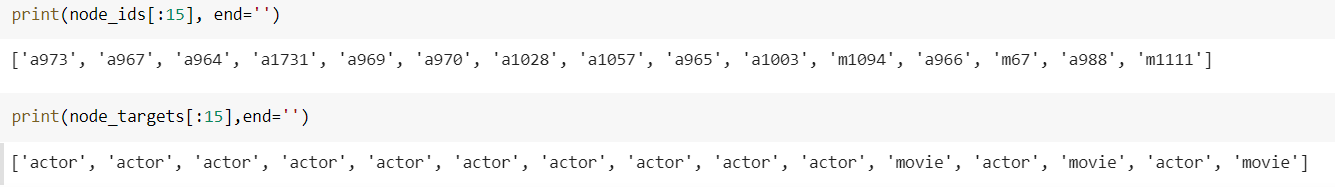

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie_nodes

    #splitting node_ids. I don't think we need node_targets for this
    for i in node_ids:
      err=0
      if i[0] == 'a':
        actor_nodes.append(i)
      elif i[0] == 'm':
        movie_nodes.append(i)
      else:
        err+=1
        print(err)

    #splitting embeddings. Here, we will need node_targets
    for a, b in zip(node_embeddings, node_targets):
      err=0
      if b == 'actor':
        actor_embeddings.append(a)
      elif b == 'movie':
        movie_embeddings.append(a)
      else:
        err+=1  #err has no role. Its absence (i.e no printing of err ) will ensure everything is okay
        print(err)
    #changing these lists into np arrays
    actor_nodes = np.array(actor_nodes)
    movie_nodes = np.array(movie_nodes)
    actor_embeddings = np.array(actor_embeddings)
    movie_embeddings = np.array(movie_embeddings)
    
    
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)
#note that no numer(err) was printed. So, everything went fine




In [ ]:
#Cluster algo( K-means++)
#class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]¶


<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ae_std= StandardScaler().fit_transform(actor_embeddings) #ae_std= "actor-embedding_std"

In [ ]:
mov_std = StandardScaler().fit_transform(movie_embeddings) #mov_std = "movie-embedding_std"

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
#take the largest subcomponent from this


In [ ]:
def cost1(graph,number_of_clusters):
  '''In this function, we will calculate cost1'''


  num_c1 = sorted([len(c) for c in nx.connected_components(graph)], reverse= True)[0] #numerator of cost1
  den_c1 = graph.number_of_nodes()                     #denominator of cost1

  cost1 =  num_c1/(den_c1)
  
  
  return cost1/number_of_clusters

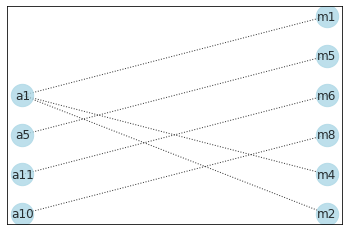

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    mov_graph = []
    act_graph = []
    for i in graph.nodes():
      if 'm' in i:
          mov_graph.append(i)
      if 'a' in i:
          act_graph.append(i)

    #print(act_graph)

    num_c2 = np.array([graph.degree(node) for node in act_graph]).sum()
    #print(num_c2)
    den_c2 = len(mov_graph) #den of cost2 , which is number of movie nodes in this particular subgraph corresponding to one cluster at a time
    cost2= num_c2/den_c2
    
    return cost2/number_of_clusters

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [ ]:
from sklearn.cluster import KMeans
cost1_for_nclust_by_act = []
cost2_for_nclust_by_act = []
cluster_params = [3,5, 10, 30, 50, 100, 200, 500]
for c in cluster_params:
  cost_1 = 0
  cost_2 = 0
  km = KMeans(n_clusters= c, random_state=0, init='k-means++')
  km.fit(ae_std)

  centres = km.cluster_centers_
  for num in range(c):
    actors_gr0 =actor_nodes[[i for i , val in enumerate(km.labels_== num) if val ==True]]
    movies_gr0 = set()
    for i in actors_gr0:
      movies_gr0 = movies_gr0.union(set(A[i])) #A[i] will give all the neighbors(which are movie nodes, given bipartite) of i(which is actor mode) in graph A.

    actors_mov_gr0 = set(actors_gr0).union(movies_gr0) # now we make a set of all the clustered actors and their neighboring movies
    lst = list()
    for i in actors_mov_gr0:
      lst.append((1,i))    #creating a list which contains edges of (dummy_node, node) with all nodes in the set actors_mov_gr0
      
    A.add_edges_from(lst) #added the dummy node connected to our reqd points
    #print(lst)

    sub = nx.ego_graph(A,1) #extracted all the nodes connected with dummy node, which were our reqd nodes only
    sub.remove_node(1)      #removing 1 from sub will not mess with the connections our nodes in actor_movie_gr0 share
    A.remove_node(1)

    """num_c1 = sorted([len(c) for c in nx.connected_components(sub)], reverse= True)[0] #numerator of cost1
    den_c1 = len(actors_mov_gr0)                      #denominator of cost1"""

    """num_c2 = np.sum([sub.degree(node) for node in actors_gr0])
    den_c2 = len(movies_gr0) #den of cost2 , which is number of movie nodes in this particular subgraph corresponding to one cluster at a time"""
    
    a = cost1(sub, c)
    b = cost2(sub, c)
    cost_1 += a
    cost_2 += b
    
  cost1_for_nclust_by_act.append(cost_1)
  cost2_for_nclust_by_act.append(cost_2)

cost1_for_nclust_by_act = np.array(cost1_for_nclust_by_act)
cost2_for_nclust_by_act = np.array(cost2_for_nclust_by_act)

real_cost_for_nclust_by_act = cost1_for_nclust_by_act*cost2_for_nclust_by_act 

optimied_num_of_clust_by_act = cluster_params[np.argmin(real_cost_for_nclust_by_act)]

  
optimied_num_of_clust_by_act


100

<font color='blue'>Displaying similar actor clusters</font>

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

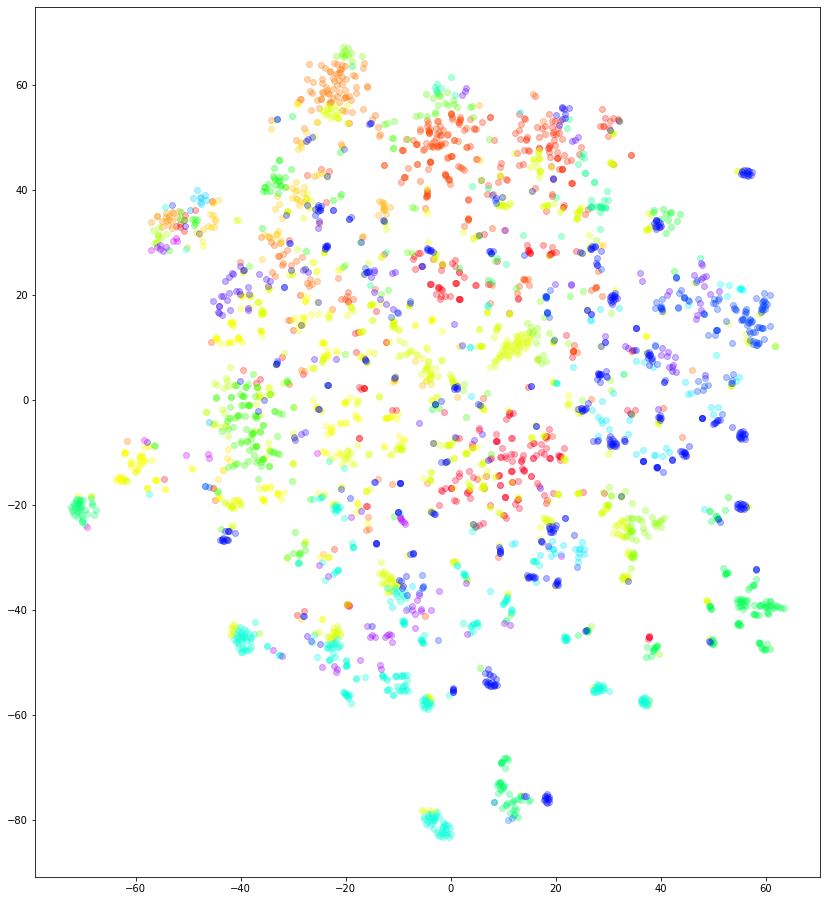

In [ ]:
km = KMeans(n_clusters= optimied_num_of_clust_by_act, random_state=0, init='k-means++')
km.fit(ae_std)
act_diff_clusters = []
centres = km.cluster_centers_
for num in range(optimied_num_of_clust_by_act):
  act_diff_clusters.append(actor_embeddings_2d[[i for i , val in enumerate(km.labels_== num) if val ==True]])

plt.figure(figsize=(20,16))

plt.axes().set(aspect="equal")


num_colors = optimized
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/num_colors) for i in range(num_colors)]

for act_clust, col in zip(act_diff_clusters, colors): 
  #act_clust = np.array(act_clust)
  #print(act_clust)
  plt.scatter(act_clust[:,0],  act_clust[:,1],c= col , alpha=0.3)
              
             
  #plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()

<font color='blue'>Grouping similar movies</font>

In [ ]:
cost1_for_nclust_by_mov = []
cost2_for_nclust_by_mov = []
cluster_params = [3,5, 10, 30, 50, 100, 200, 500]
for c in cluster_params:
  cost_1_mov = 0
  cost_2_mov = 0
  km = KMeans(n_clusters= c, random_state=0, init='k-means++')
  km.fit(mov_std)

  centres = km.cluster_centers_
  for num in range(c):
    movies_gr =movie_nodes[[i for i , val in enumerate(km.labels_== num) if val ==True]]
    actors_gr = set()
    for i in movies_gr:
      actors_gr = actors_gr.union(set(A[i])) #A[i] will give all the neighbors(which are actor nodes, given bipartite) of i(which is a movie node) in graph A.

    actors_mov_gr0 = set(actors_gr).union(movies_gr) # now we make a set of all the clustered movies and their neighboring actors
    lst = list()
    for i in actors_mov_gr0:
      lst.append((1,i))    #creating a list which contains edges of (dummy, node) with all nodes in the set actors_mov_gr0
      
    A.add_edges_from(lst) #added the dummy node connected to our reqd points
    #print(lst)

    sub = nx.ego_graph(A,1) #extracted all the nodes connected with dummy node, which were our reqd nodes only
    sub.remove_node(1)      #removing 1 from sub will not mess with the connections our nodes in actor_movie_gr0 share
    A.remove_node(1)

    """num_c1 = sorted([len(c) for c in nx.connected_components(sub)], reverse= True)[0] #numerator of cost1, which is actually the number of nodes in the largest connected component of the subgraph corresponding to a given cluster
    den_c1 = len(actors_mov_gr0)                      #denominator of cost1

    num_c2 = np.sum([A.degree(node) for node in movies_gr]) #numerator of cost2, which is sum of the number of links each movie node present in the subgraph of a given cluster
    den_c2 = len(actors_gr) #den of cost2 , which is number of movie nodes in this particular subgraph corresponding to one cluster at a time
    """
    c1 = cost1(sub, c)
    c2 = cost2(sub, c)
    cost_1_mov += c1
    cost_2_mov += c2
    
  cost1_for_nclust_by_mov.append(cost_1_mov)
  cost2_for_nclust_by_mov.append(cost_2_mov)

cost1_for_nclust_by_mov = np.array(cost1_for_nclust_by_mov)
cost2_for_nclust_by_mov = np.array(cost2_for_nclust_by_mov)

real_cost_for_nclust_by_mov = cost1_for_nclust_by_mov*cost2_for_nclust_by_mov 

optimied_num_of_clust_by_mov = cluster_params[np.argmin(real_cost_for_nclust_by_mov)]

  
optimied_num_of_clust_by_mov

3

<font color='blue'>Displaying similar movie clusters</font>

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)



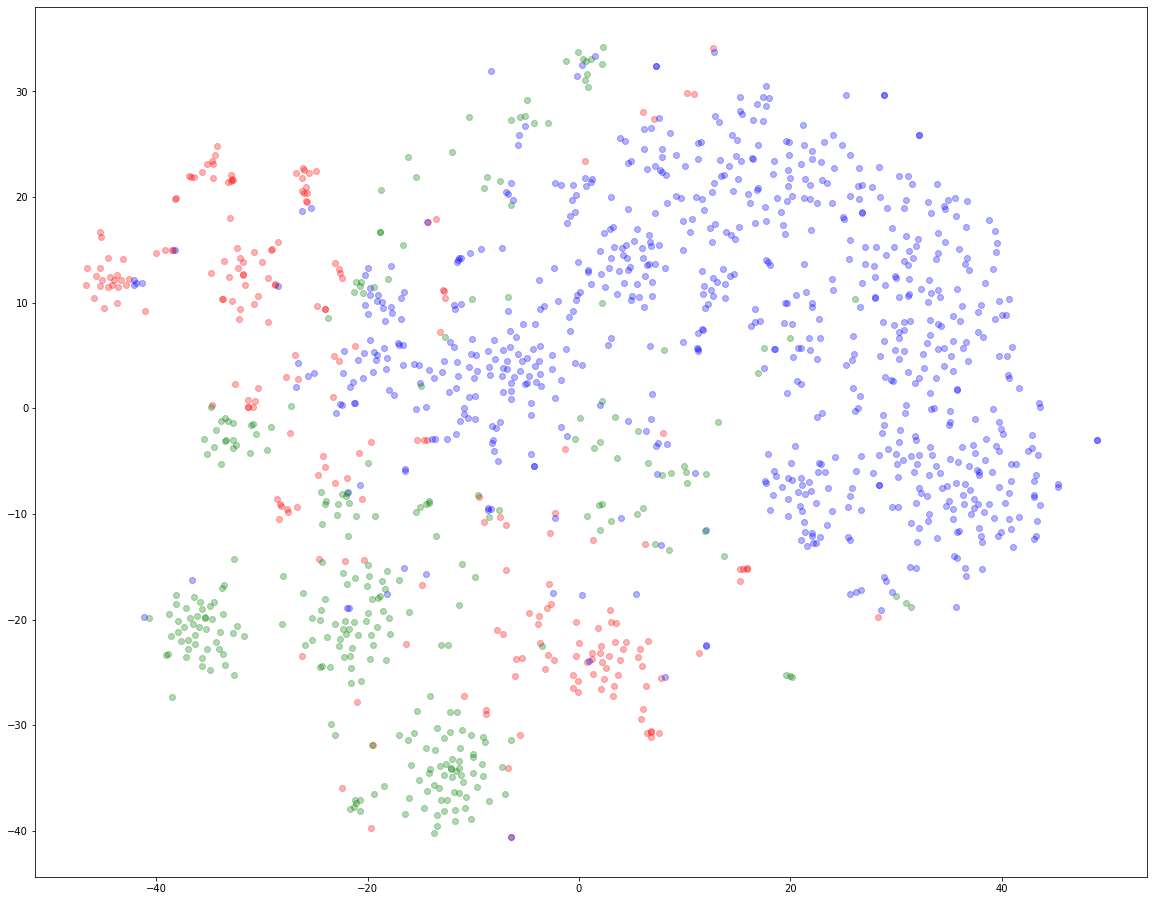

In [ ]:
kmov = KMeans(n_clusters= optimied_num_of_clust_by_mov, random_state=0, init='k-means++')
kmov.fit(mov_std)
mov_diff_clusters = []
#centres_mov = km.cluster_centers_
for num in range(optimied_num_of_clust_by_mov):
  mov_diff_clusters.append(movie_embeddings_2d[[i for i , val in enumerate(kmov.labels_== num) if val ==True]])

plt.figure(figsize=(20,16))

plt.axes().set(aspect="equal")

#colors_lst = ['#c0c0c0 ', '#2f4f4f', '#556b2f', '#6b8e23', '#a0522d', '#7f0000', '#708090', '#483d8b', '#008000', '#3cb371', '#008080', '#cd853f', '#4682b4', '#9acd32', '#cd5c5c', '#00008b', '#32cd32', '#daa520', '#8fbc8f', '#800080', '#b03060', '#9932cc', '#ff4500', '#ff8c00', '#ffd700', '#ffff00', '#0000cd', '#00ff00', '#00fa9a']
num_colors_mov = optimied_num_of_clust_by_mov
cm = plt.get_cmap('gist_rainbow')
colors_movie = [cm(1.*i/num_colors) for i in range(num_colors_mov)]
colors_mov = ['r','b','g']
for mov_clust, col in zip(mov_diff_clusters, colors_mov): 
  #act_clust = np.array(act_clust)
  #print(act_clust)
  plt.scatter(mov_clust[:,0],  mov_clust[:,1],c= col , alpha=0.3)
              
             
  #plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()